<a href="https://colab.research.google.com/github/Gayatri259/TFS_GRIP/blob/main/TFS_GRIP_Task-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The** **Sparks** **Foundation**
### #GRIPFEB21 TASK-5

#**NAME:** **Gayatri** **Chabra** 
#**TOPIC:** **Exploratory** **Data** **Analysis-** **Sports**
In this task, we found out the most successful teams, players and factors contributing win or loss of a team.

This data can be found at https://bit.ly/34SRn3b

#**Importing** **Libraries**

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#**Loading** **and** **Reading** **the** **Dataset** **"Matches"**

In [5]:
df=pd.read_csv('/content/matches.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
df.shape

(756, 18)

In [7]:
df.size

13608

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [10]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
df.duplicated().sum()

0

In [52]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

#**To** **Check** **Which** **Team** **Won** **by** **Runs** **and** **Wickets**

In [13]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [14]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner']

'Mumbai Indians'

In [15]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmax]['winner']

'Kolkata Knight Riders'

##**Visualising** **the** **Number** **of** **Matches** **Every** **Season**

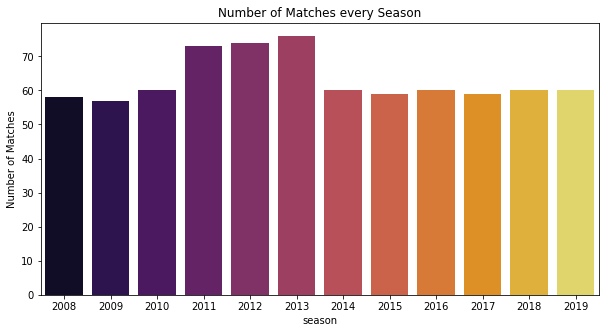

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='season', palette='inferno')
plt.title("Number of Matches every Season")
plt.ylabel("Number of Matches")
plt.show()

##**Visualising** **the** **Number** **of** **Matches** **Won** **by** **Each** **Team**

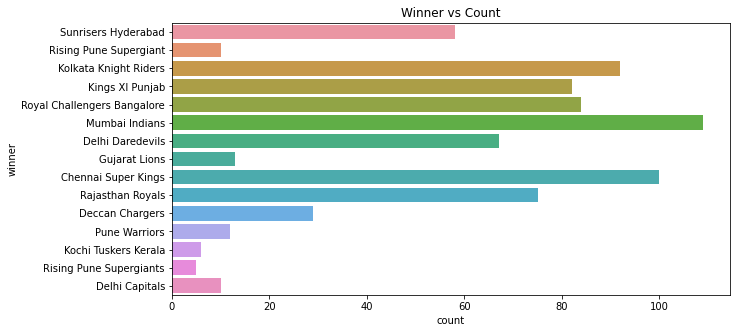

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='winner')
plt.title("Winner vs Count")
plt.show()

##**Number** **of** **Matches** **Played** **in** **Each** **City**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


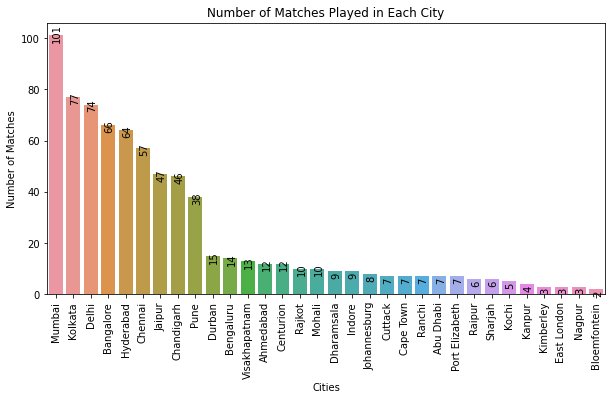

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['city'], order=df['city'].value_counts().index)
count=0
cities=pd.DataFrame(df['city'].value_counts())
cities['name']= df['city'].value_counts().index
for i in cities['city']:
  plt.text(count-0.2,i-2,str(i), rotation=90, size=10)
  count+=1

plt.xlabel("Cities")
plt.ylabel("Number of Matches")
plt.xticks(rotation=90)
plt.title("Number of Matches Played in Each City")
plt.show()

## **Top** **Players** **who** **won** **the** **Player** **of** **the** **Match** **Award**

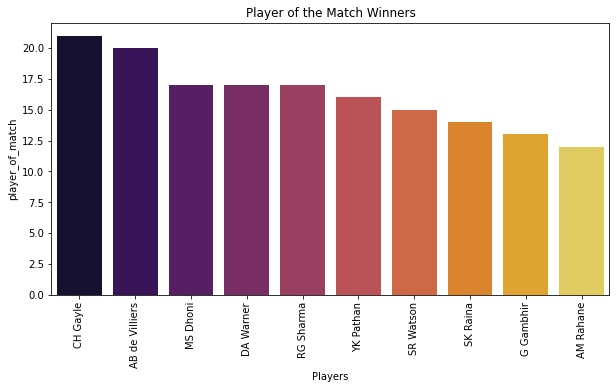

In [19]:
TopPlayers=df.player_of_match.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xlabel("Players")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Player of the Match Winners")
sns.barplot(x=TopPlayers.index, y=TopPlayers, palette="inferno")
plt.show()

## **Checking** **Whether** **Winning** **the** **Toss** **Determines** **Winning** **the** **Match**

In [20]:
toss=df['toss_winner']==df['winner']
toss.groupby(toss).size()

False    363
True     393
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


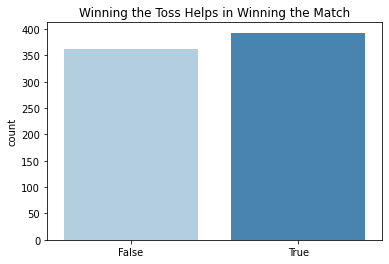

In [21]:
sns.countplot(toss, palette='Blues')
plt.title("Winning the Toss Helps in Winning the Match")
plt.show()

## **Visualising** **the** **IPL** **Teams'** **Wins** **to** **Determine** **the** **Most** **Successful** **Teams**

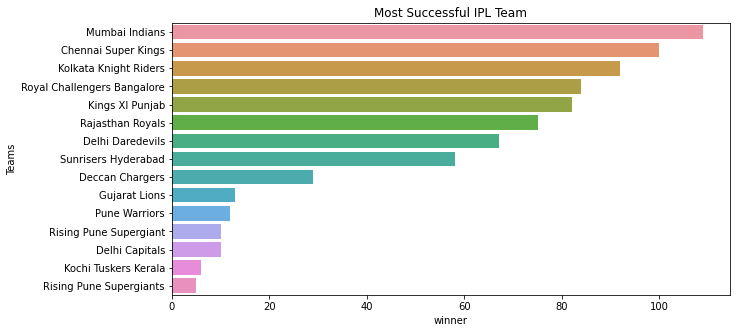

In [22]:
plt.figure(figsize=(10,5))
teams=df.winner.value_counts()
sns.barplot(x=teams, y=teams.index)
plt.title("Most Successful IPL Team")
plt.ylabel("Teams")
plt.show()

# **Loading** **and** **Reading** **the** **Dataset** **"Deliveries"**

In [24]:
df1=pd.read_csv('/content/deliveries.csv')
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [25]:
df1.shape

(179078, 21)

In [26]:
df1.size

3760638

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [28]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [29]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [30]:
df1.duplicated().sum()

23

In [31]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

## **Merging** **the** **two** **Datasets** **into** **a** **new** **Dataset** **and** **Reading** **it**

In [32]:
df2=pd.merge(df1, df, left_on='match_id', right_on='id')
df2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179050,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179051,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179052,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179053,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [33]:
df2.shape

(179055, 39)

In [34]:
df2.size

6983145

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179054
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [36]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948,1801.169758,2013.443869,0.017916,13.404490,3.261517
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470,3471.116142,3.363623,0.132648,23.261916,3.347058
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [37]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [38]:
df2.duplicated().sum()

0

##**Visualising** **the** **Number** **of** **Matches** **Played** **in** **Each** **Season** 

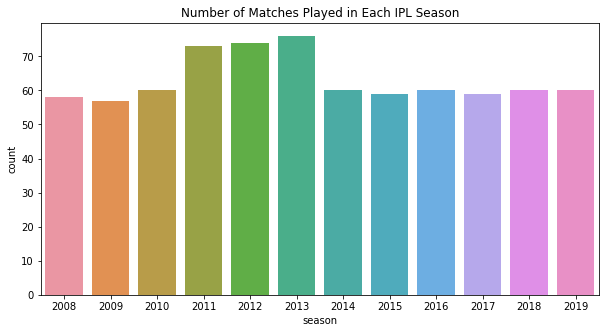

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.season)
plt.title("Number of Matches Played in Each IPL Season")
plt.show()

## **Stadiums** **vs** **Count**

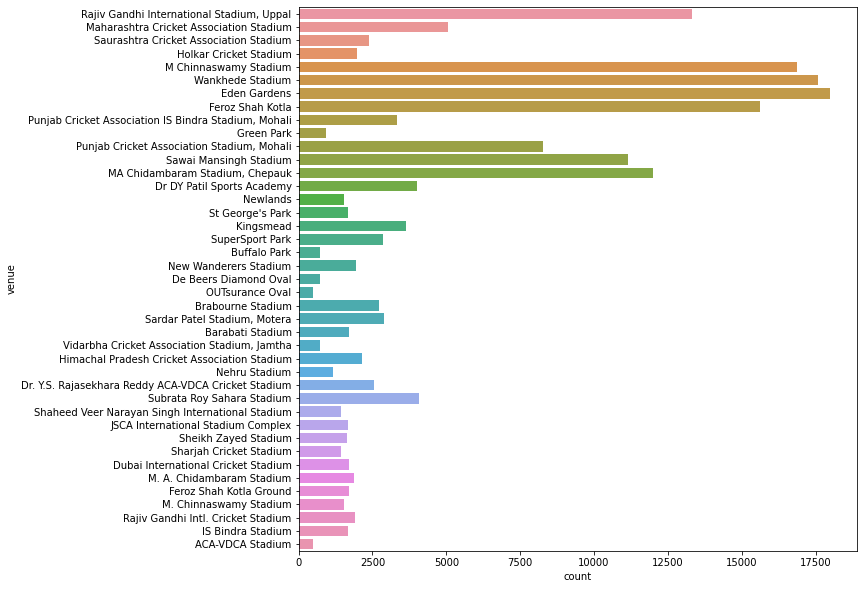

In [66]:
df2.venue.value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=df2, y='venue')
plt.show()

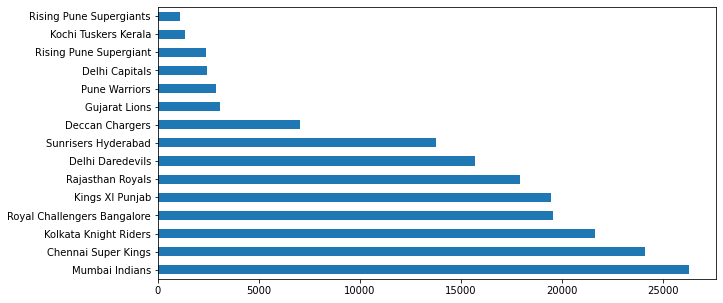

In [41]:
df2['winner'].value_counts().sort_values(ascending=False).plot(kind='barh', figsize=(10,5))

## **Analysing** **the** **Winner** **in** **Every** **Season** 

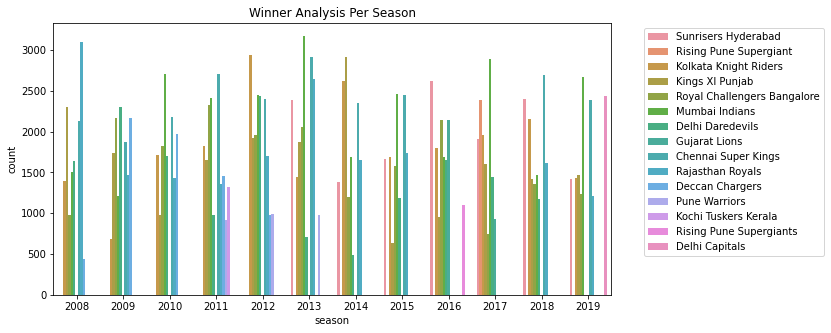

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='season', hue='winner')
plt.legend(bbox_to_anchor=(1.05,1.0), loc="upper left")
plt.title("Winner Analysis Per Season")
plt.show()

##**Deciding** **Whether** **to** **Bat** **or** **Field** **After** **Winning** **the** **Toss**

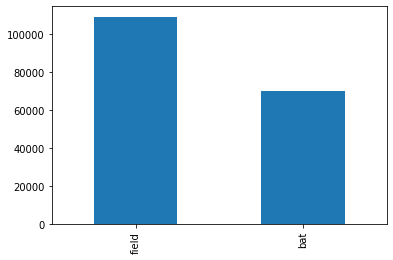

In [43]:
tossd=df2.toss_decision.value_counts().plot(kind='bar')
tossd

## **Winning** **the** **Toss** **Vs** **Winning** **the** **Match**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Toss Wins vs Match Wins')

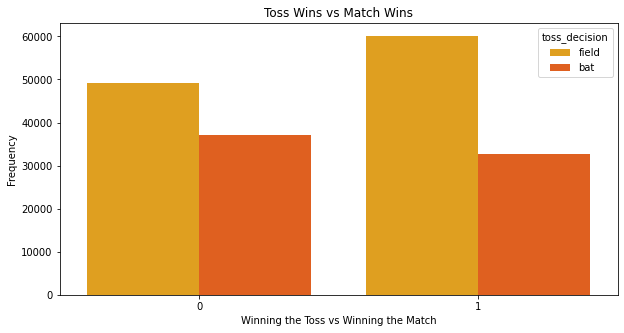

In [44]:
df2['team_toss_win']=np.where((df2.toss_winner==df2.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot('team_toss_win', data=df2, hue='toss_decision', palette='autumn_r')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Match Wins")

##**Top** **5** **Players** **Winning** **the** **Player** **of** **the** **Match** **Award**

Text(0.5, 0, 'Player Name')

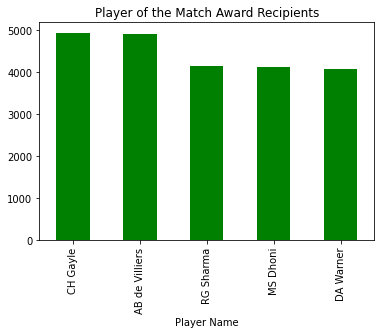

In [57]:
pom=df2['player_of_match'].value_counts().head().plot(kind='bar', color='green')
plt.title("Player of the Match Award Recipients")
plt.xlabel("Player Name")

##**Runs** **Scored** **by** **Batsmen** **in** **each** **Season**

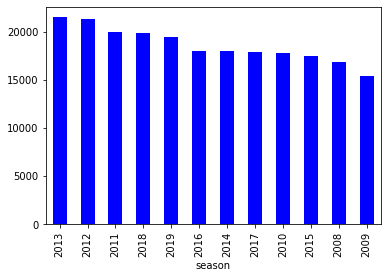

In [47]:
df2.groupby('season')['batsman_runs'].sum().sort_values(ascending= False).plot(kind='bar', color='blue')

## **Top 5 Run Scorers**

Text(0.5, 1.0, 'Top Run Scorers')

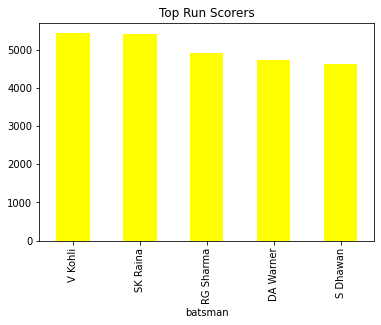

In [58]:
df2.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='yellow')
plt.title("Top Run Scorers")

## **Bowlers** **with** **Maximum** **Bowling** **Chances**

Text(0.5, 1.0, 'Bowlers who got the Maximum Bowling Chances')

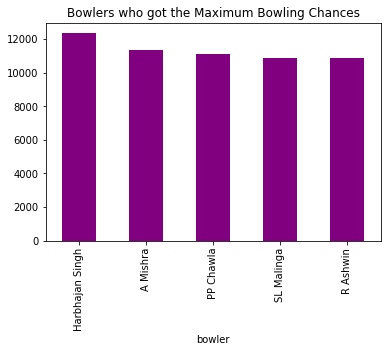

In [60]:
df2.groupby('bowler')['ball'].agg("sum").sort_values(ascending=False).head().plot(kind='bar', color='purple')
plt.title("Bowlers who got the Maximum Bowling Chances")

## **Bowlers** **who** **gave** **the** **Maximum** **Extra** **Runs**

Text(0.5, 1.0, 'Bowlers who gave the Maximum Extra Runs to the Opposite Team')

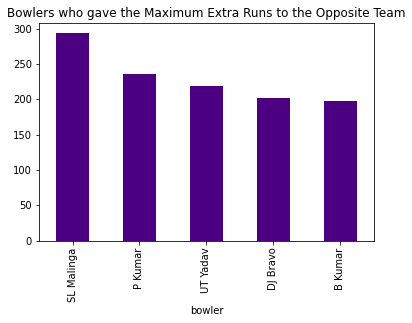

In [61]:
df2.groupby('bowler')['extra_runs'].agg("sum").sort_values(ascending=False).head().plot(kind='bar', color='indigo')
plt.title("Bowlers who gave the Maximum Extra Runs to the Opposite Team")

##**Top** **10** **Wicket** **Takers**

Text(0.5, 1.0, 'Top 10 Wicket Takers')

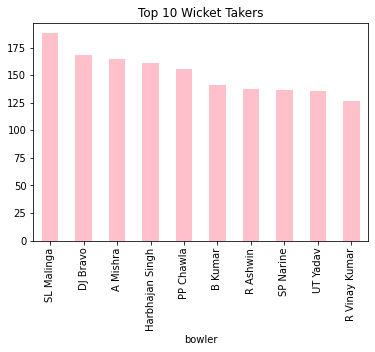

In [62]:
df2.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='pink')
plt.title("Top 10 Wicket Takers")